In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import load_pickle
%matplotlib inline

sns.set_theme()

In [2]:
PATH='./results/TestSuite-06_13_2021-23_53_02'

In [3]:
data = load_pickle(PATH)

In [14]:
data[2]

{'task': 'MNIST',
 'graph': 'FullyConnectedGraph',
 'nr_classes': 3,
 'nr_nodes': 32,
 'training_epochs': [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
 'epoch_list': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 'add_privacy_list': False,
 'epsilon_list': 0.1,
 'delta_list': 0.5,
 'batch_size': 25,
 'node_0': {'lr': 0.0001,
  'alpha': 0.5,
  'test_accuracies': [0.11743589743589747,
   0.09871794871794873,
   0.10179487179487179,
   0.09871794871794873,
   0.10487179487179486,
   0.11410256410256411,
   0.12025641025641026,
   0.13256410256410256,
   0.151025641025641,
   0.1725641025641026,
   0.17871794871794874,
   0.19102564102564107,
   0.2002564102564103,
   0.20948717948717954,
   0.2156410256410257,
   0.2374358974358975,
   0.24974358974358982,
   0.2623076923076924,
   0.27794871794871806,
   0.2933333333333334,
   0.3056410256410257,
   0.311794871

In [32]:
def get_top1_accuracy(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(max(node_dict['train_losses']))

    return top_acc_list, sum(top_acc_list)/len(top_acc_list)

In [40]:
def get_top1_per_epoch(results):
    nr_nodes = results['nr_nodes']
    top_acc_list = []
    for i in range(nr_nodes):
        node_dict = results[f'node_{i}']
        top_acc_list.append(node_dict['test_accuracies'])
    transpose = list(zip(*top_acc_list))
    return [max(node) for node in transpose]

In [41]:
get_top1_per_epoch(data[0])

[0.5404000000000002,
 0.7328000000000005,
 0.7824000000000007,
 0.8212000000000009,
 0.8496000000000007,
 0.8724000000000008,
 0.8871999999999995,
 0.9060000000000001,
 0.9192,
 0.9239999999999999,
 0.934,
 0.9424000000000001,
 0.9464000000000005,
 0.9496000000000002,
 0.9568000000000001,
 0.9587999999999998,
 0.9607999999999999,
 0.9603999999999999,
 0.9635999999999997,
 0.9627999999999998,
 0.9635999999999999,
 0.9655999999999998,
 0.9679999999999996,
 0.9679999999999996,
 0.9695999999999997,
 0.9707999999999997,
 0.9703999999999996,
 0.9715999999999997,
 0.9723999999999998,
 0.9723999999999997]

In [44]:
def graph_top1_epochs(results, n_subplots = 3):
    
    sns.set_style("whitegrid")
    sns.set_palette("colorblind")
    
    f, ax = plt.subplots(1, n_subplots, sharex=True, sharey=True, figsize=(13,5))
        
    for idx, run in enumerate(results):
        ax[idx%3].plot(run['epoch_list'], get_top1_per_epoch(run), label=f"{run['graph']}")
        #ax[idx%3].set_xticklabels(run['epoch_list'], fontsize=12)
        ax[idx%3].tick_params(axis='x', labelsize=15)
        ax[idx%3].tick_params(axis='y', labelsize=13)
        
        
    for i in range(n_subplots):
        ax[i].set_xlabel("Epochs", fontsize=18)
        ax[i].set_ylabel("Test Accuracy", fontsize=18)
        ax[i].set_xlim(right=30)
        
    ax[2].legend()
    plt.title('')

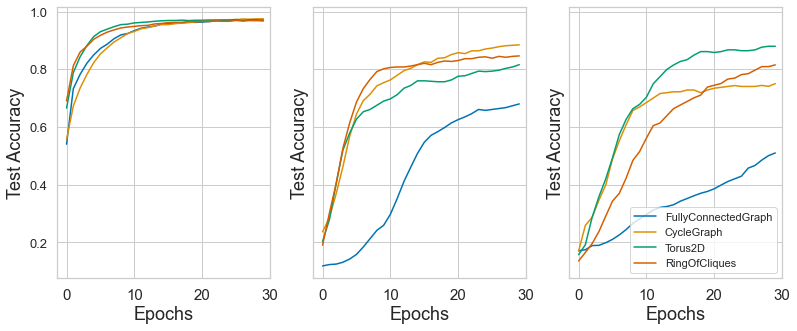

In [45]:
fig = graph_top1_epochs(data)
fig
#plt.savefig("./plots/topology_testrun.pdf")

In [37]:
def graph_top1_bytes(results):
    f, ax = plt.subplots(1, 1)
    for run in results:
        ax = sns.lineplot(x = run['node_0']['sent_bytes'],y = get_top1_per_epoch(run), label=f"{run['nr_nodes']} Nodes")
    ax.legend()
    plt.xlabel('Bytes')
    plt.ylabel('Accuracy')

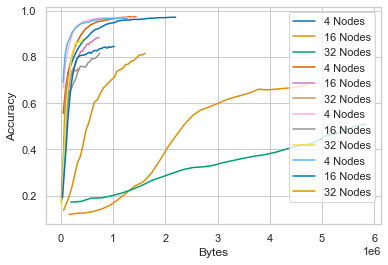

In [11]:
graph_top1_bytes(data)

In [56]:
a = [None, 5, None, 7, 10]

In [57]:
if a:
    print('a')

a


In [58]:
a.remove(None)

In [59]:
a

[5, None, 7, 10]

In [60]:
len([[]])

1

In [72]:
a = [1,2,3,4,5,6]
b = iter(a)

In [79]:
next(iter(b))

StopIteration: 